*This Notebook was created by Antoine Palisson*

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

This exercise focus on the preprocessing steps of **Numerical variables**.

Only a fraction of the methods will be used in this Notebook, including:

* Random & Stratified Splitting 
* Missing Data deletion & imputation with median
* Outliers detection using the IQR & imputation using winsorization
* Scaling using the min-max transformation and the z-score transformation
* Transformation of the features using the log transformation 

**Depending on the dataset, it may be interesting to use other methods seen in the lesson (missing Data imputation using ML models, outlier detection using z-score, robust scaling, other transformation ...)**

In this course, we will use the Scikit-learn library a lot.<br>
**You can find the preprocessing functions of the sklearn library** [**here**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

# Splitting, Missing & Outliers

**<font color='blue'>1. Load the modified iris dataset (`iris_m.csv`) and show its content.**

In [2]:
df_iris = pd.read_csv('iris_m.csv')
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,3.5,1.4,0.2,0
1,4.9,3.0,1.4,NaN,0
2,4.7,3.2,1.3,0.2,0
3,36.8,3.1,1.5,0.2,0
4,5.0,NaN,12.6,NaN,0
...,...,...,...,...,...
145,6.7,3.0,NaN,2.3,2
146,6.3,2.5,5.0,17.1,2
147,6.5,NaN,5.2,12.0,2
148,6.2,3.4,5.4,2.3,2


In [77]:
df_iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

The `.info()` method can be used on a dataframe to get a resume of its variables, length and missing values. This method has some parameters such as the **show_counts** parameter that can be either True or False, if True the method returns the number of non-missing values in the dataset.

**<font color='blue'>2. Show a resume of the dataset variables, length and missing values.<br>Is there any missing variable ?**

In [3]:
# Except target value, there are all have missing value.
df_iris.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  133 non-null    float64
 1   sepal width (cm)   134 non-null    float64
 2   petal length (cm)  134 non-null    float64
 3   petal width (cm)   133 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Splitting

There are many ways to split a dataset into a training and a testing set:

*   Train-test split using scikit-learn
*   Slicing using numpy
*   Sample using pandas

In the following, we will use the `train_test_split` function from sklearn [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).<br> Here are some of the most important parameters:

*   **`test_size`**: This parameter specifies the proportion of the dataset to be used for testing. It is typically set to a decimal value between 0 and 1, where 0.2 or 0.3 is commonly used.

*   **`train_size`**: This parameter specifies the proportion of the dataset to be used for training. If test_size is not specified, the remaining portion of the dataset will be used for training. If both test_size and train_size are specified, test_size takes precedence.

*   **`random_state`**: This parameter sets the random seed for the random number generator used for the train-test split. Setting a fixed random_state ensures that the same split is obtained every time the code is run, which is useful for reproducibility.

*   **`shuffle`**: This parameter determines whether or not to shuffle the dataset before splitting. By default, it is set to True, meaning that the data is shuffled randomly before splitting.

*   **`stratify`**: This parameter is used for stratified sampling, which ensures that the proportion of each class or category is preserved in both the training and testing sets. It requires a target vector y to be passed as an argument.

In addition to its parameters, an indefinite number of datasets can be passed to the function:
> `train_test_split(X_1, X_2, X_3 ...)`

The `train_test_split` function returns two times the number of datasets passed as inputs: the training sets and then the testing sets.<br>
> `X_train, X_test = train_test_split(X, ...)`<br>
> `X_train, X_test, Y_train, Y_test = train_test_split(X, Y ...)`<br>
> `X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z ...)`



**<font color='blue'>1. Split the iris dataset into 3 sets using the `train_test_split` function:**


*   **<font color='blue'>Training (70% of the data)**
*   **<font color='blue'>Validation (10% of the data)**
*   **<font color='blue'>Testing (20% of the data)**



In [4]:
X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]

In [38]:
#Splitting train dataset and test+val dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.8)

In [39]:
#Splitting train dataset and val dataset
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size = 7/8)

In [30]:
print(len(X_val))
print(len(y_val))

15
15


**<font color='blue'>2. Count the frequency of categories in the target column of the training, the validation and the testing set.<br> Are the frequencies identical in the 3 sets ?**

*Tips: You can use the `value_counts()` function and set the normalize argument to True in order to get frequencies.*

In [40]:
print('Training data:\n{0}'.format(y_train.value_counts()))
print('Validation data:\n{0}'.format(y_val.value_counts()))
print('Testing data:\n{0}'.format(y_test.value_counts()))
#Yes

Training data:
1    36
0    36
2    33
Name: target, dtype: int64
Validation data:
2    7
1    6
0    2
Name: target, dtype: int64
Testing data:
0    12
2    10
1     8
Name: target, dtype: int64


**<font color='blue'>3. Set the `stratify` parameter of the train_test_split function to the target column and re-create the training, validation and testing sets.**

In [5]:
#Splitting train dataset and test+val dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.8, stratify=y)
#Splitting train dataset and val dataset
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size = 7/8, stratify = y_train)

**<font color='blue'>4. Count the frequency of categories in the target column of the training, the validation and the testing set.<br> Are the frequencies identical in the 3 sets now ?**

In [6]:
print('Training data:\n{0}'.format(y_train.value_counts()))
print('Validation data:\n{0}'.format(y_val.value_counts()))
print('Testing data:\n{0}'.format(y_test.value_counts()))
#No, 

Training data:
0    35
2    35
1    35
Name: target, dtype: int64
Validation data:
2    5
0    5
1    5
Name: target, dtype: int64
Testing data:
2    10
1    10
0    10
Name: target, dtype: int64


**<font color='blue'>5. Separate the features from the target for the training, the validation and the testing sets.**

## Missing data

The missing values can be found in a dataframe using the `.isna()` method.

**<font color='blue'>1. Count the number of NaN in the feature of the training iris dataframe.**

*Tips: You can use the `.isna()` method and the `.sum()` method.*

In [192]:
df_iris.isna().sum()

sepal length (cm)    17
sepal width (cm)     16
petal length (cm)    16
petal width (cm)     17
target                0
dtype: int64

Pandas provides a `.dropna()` function that can be used to remove rows or columns that contain missing values (i.e., NaN values) from a DataFrame. This function returns a new DataFrame with the missing values removed, leaving only the non-missing values.

Here are some of the most important parameters of the dropna() function in pandas:

* `axis`: This parameter specifies whether to drop rows (axis=0) or columns (axis=1) that contain missing values. By default, axis=0 is used to drop rows.

* `how`: This parameter specifies the criteria for dropping rows or columns. The how parameter can take the value 'any' or 'all'. If 'any' is specified, any row or column with at least one missing value will be dropped. If 'all' is specified, only rows or columns where all values are missing will be dropped.

* `thresh`: This parameter specifies the minimum number of non-missing values required for a row or column to be kept. Rows or columns with fewer than thresh non-missing values will be dropped. The thresh parameter can be used to keep only rows or columns that have a certain level of completeness.

* `subset`: This parameter specifies a subset of columns to consider when dropping rows or columns. Only the specified columns will be checked for missing values. This parameter can be useful when there are some columns in the DataFrame that are not relevant for the analysis.

* `inplace`: This parameter specifies whether to modify the DataFrame in place (inplace=True) or return a new DataFrame with the missing values removed (inplace=False). By default, inplace=False.

**<font color='blue'>2.a. Create a copy of the feature of iris_train using the .copy() function.<br>2.b. Drop the missing values on the copy of the iris_train.<br>How many rows were removed ?**

In [8]:
iris_train = X_train.copy()
print(len(iris_train))
iris_train.dropna(axis=0, how='any')
#38 rows were removed

105
67


Missing values can be imputed using either pandas or sklearn.

The `sklearn.impute` [module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) in scikit-learn provides various classes for imputing missing values in datasets. This module contains several popular strategies for handling missing values, including:

*   `SimpleImputer`: This class provides a basic imputation strategy for missing values in numerical datasets. It allows the user to specify a strategy for filling in missing values, such as using the mean, median, or most frequent value of each column.

*   `KNNImputer`: This class provides an unsupervised ML imputation strategy that uses the k-nearest neighbors algorithm to impute missing values in numerical datasets. It estimates each missing value based on the values of its k-nearest neighbors in the dataset.

Here are some of the most important parameters of the `SimpleImputer` class:

* `missing_values`: This parameter specifies the value or values that should be treated as missing values. By default, missing_values=np.nan is used to identify missing values.

* `strategy`: This parameter specifies the strategy used for imputing missing values. The possible values are 'mean', 'median', 'most_frequent', or 'constant'. If 'mean' is specified, missing values are imputed using the mean value of the corresponding feature. If 'median' is specified, missing values are imputed using the median value of the corresponding feature. If 'most_frequent' is specified, missing values are imputed using the most frequent value of the corresponding feature. If 'constant' is specified, missing values are imputed with a user-specified constant value.

* `fill_value`: This parameter is used only when the strategy parameter is set to 'constant'. It specifies the value that should be used to impute missing values.

To use the `SimpleImputer`, you need to:

1.   Create the imputer
2.   Fit the imputer on the desired data
3.   Transform the desired data

```
imp = SimpleImputer(...)
imp_mean.fit(X)
X_no_nan = imp_mean.transform(X)
```

`SimpleImputer` also have some attributes that can be used after using the fit() method on the data.<br> The `statistics_` attribute is an attribute of the `SimpleImputer` class in scikit-learn, which contains the imputation values for each feature in the input dataset.

**<font color='blue'>3.a. Create a copy of the iris_train using the `.copy()` function.<br>3.b. Replace the missing values on the copy of the iris_train by their median using the `SimpleImputer` from sklearn.<br>3.c. Get the median values for each columns using the `statistics_` attribute.**

In [114]:
iris_train = X_train.copy()
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(iris_train)
print('Median values: ', imp_median.statistics_)
X_no_nan_train = imp_median.transform(iris_train)
print("Training dataset without Nan: ", X_no_nan_train)
iris_train = pd.DataFrame(X_no_nan_train, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(iris_train)

Median values:  [6.  3.  4.6 1.5]
Training dataset without Nan:  [[ 5.2  3.5  1.5  0.2]
 [ 7.7  2.8  6.7 18. ]
 [ 6.3  3.3  4.7  1.6]
 [ 5.   3.3  1.4  0.2]
 [ 5.6  2.8  4.9  2. ]
 [ 6.   3.2  5.3  2.3]
 [ 5.8 21.6  3.9  1.2]
 [ 6.   2.2  5.   1.5]
 [ 6.9  3.2  5.7  2.3]
 [ 6.2  3.4  5.4  2.3]
 [50.4  3.3  6.   2.5]
 [ 4.4  3.   1.3  1.8]
 [ 6.   2.2  4.   1. ]
 [ 7.3  3.   6.3  1.8]
 [ 5.1  3.7  1.5  3.6]
 [38.4 18.6  1.6  0.2]
 [ 6.7  3.3 28.5  2.5]
 [ 6.5  2.8  4.6  1.5]
 [ 6.   2.9  4.7  1.4]
 [ 6.1  2.8  4.6  1.2]
 [ 5.   3.4  4.6  0.4]
 [ 4.9  3.1  1.5  0.7]
 [ 6.   3.   8.   0.2]
 [ 5.8  2.7  5.1  1.9]
 [ 6.2  2.8  4.8  1.8]
 [ 5.6  3.  20.5  1.3]
 [ 6.9  3.1  5.4  2.1]
 [ 7.9  3.8  6.4  2. ]
 [ 5.2  4.1  1.5  0.1]
 [ 6.3  2.5 44.1  1.5]
 [ 7.2  3.   4.6  1.6]
 [ 6.   3.5  1.4  0.2]
 [ 6.9  3.   4.9  1.5]
 [ 5.   3.  12.6  1.5]
 [ 6.8 28.8  5.9 16.1]
 [ 6.   3.   4.6  1.7]
 [ 6.   3.   4.4  1.4]
 [ 5.8  2.7  5.1  1.5]
 [ 5.9  3.2  4.8  1.8]
 [56.7  2.3  4.4  1.3]
 [27.6  3.4  1.

**<font color='blue'>4. Apply the missing values imputation to the validation and the testing sets.**

*Tips: You must reuse the computations made on the training set (e.g. the median should not be calculated on the validation and the testing sets)*

In [67]:
iris_val = X_val.copy()
imp_median.fit(iris_val)
X_no_nan_val = imp_median.transform(iris_val)
print(X_no_nan_val)
iris_val = pd.DataFrame(X_no_nan_val, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(iris_val)

[[ 7.7  15.6   6.9   2.3 ]
 [33.6   3.    1.4   0.1 ]
 [ 6.55 20.3   4.3   6.5 ]
 [ 7.    3.2   4.7   1.25]
 [40.8   3.8   1.6   0.2 ]
 [ 6.4   3.1  27.5  12.6 ]
 [ 5.7   3.3   4.55  1.3 ]
 [ 5.8  13.    4.    1.2 ]
 [ 6.7   3.3   5.7   2.1 ]
 [ 5.    3.    1.6   0.2 ]
 [ 7.1   3.3   5.9   2.1 ]
 [52.2   4.    1.2   0.2 ]
 [ 5.8   2.8   5.1  16.8 ]
 [ 5.5   2.6   4.4   1.2 ]
 [ 4.8  30.6   9.5   0.2 ]]
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                7.70              15.6               6.90              2.30
1               33.60               3.0               1.40              0.10
2                6.55              20.3               4.30              6.50
3                7.00               3.2               4.70              1.25
4               40.80               3.8               1.60              0.20
5                6.40               3.1              27.50             12.60
6                5.70               3.3               4

In [68]:
iris_test = X_test.copy()
imp_median.fit(iris_test)
X_no_nan_test = imp_median.transform(iris_test)
print(X_no_nan_test)
iris_test = pd.DataFrame(X_no_nan_test, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(iris_test)

[[ 6.5  3.   5.2 12. ]
 [ 5.7  2.2  4.5  1.5]
 [ 4.9  2.4  4.5  1.5]
 [ 5.2  3.4  4.5  1.5]
 [ 6.3  2.5  5.  17.1]
 [ 6.4  3.2 40.5  1.5]
 [ 5.1  3.5  1.4  0.3]
 [ 4.6  3.2  1.4  0.2]
 [ 5.7  2.8  4.5  1.5]
 [ 6.4  2.8  5.6  2.1]
 [ 4.3  3.   1.1  1.5]
 [ 7.4  2.8  6.1 13.3]
 [ 5.1  3.   1.5  0.3]
 [ 5.7  3.   3.8  1.1]
 [ 5.7  2.8  4.1  1.3]
 [ 5.   3.5  1.6  1.5]
 [ 5.7  3.4  4.5  0.2]
 [36.   3.   6.1  2.5]
 [ 6.7  3.1  5.6  2.4]
 [ 4.4  2.9  1.4  0.2]
 [ 7.7  3.  36.6  2.3]
 [ 6.   3.4  4.5  1.6]
 [ 6.5  3.   5.8  2.2]
 [ 5.4 19.5  1.3  0.4]
 [ 6.1  2.8  4.   1.3]
 [ 7.7 34.2 40.2  2.2]
 [ 5.6  2.9  4.5  1.3]
 [50.4  3.2  6.   1.8]
 [ 4.8  3.   1.4  0.3]
 [ 5.5  3.   3.7  1. ]]
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 6.5               3.0                5.2              12.0
1                 5.7               2.2                4.5               1.5
2                 4.9               2.4                4.5               1.5
3

## Outliers

In the following exercise, we will use the imputed feature training set.

**<font color='blue'>1. Display the histograms of the imputed features of the training iris *(i.e. the ones that does not contain NaN anymore)*.<br> Can you see outliers ?**

*Tips: Outliers are easier to detect if you increase the number of bins in your histogram*

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

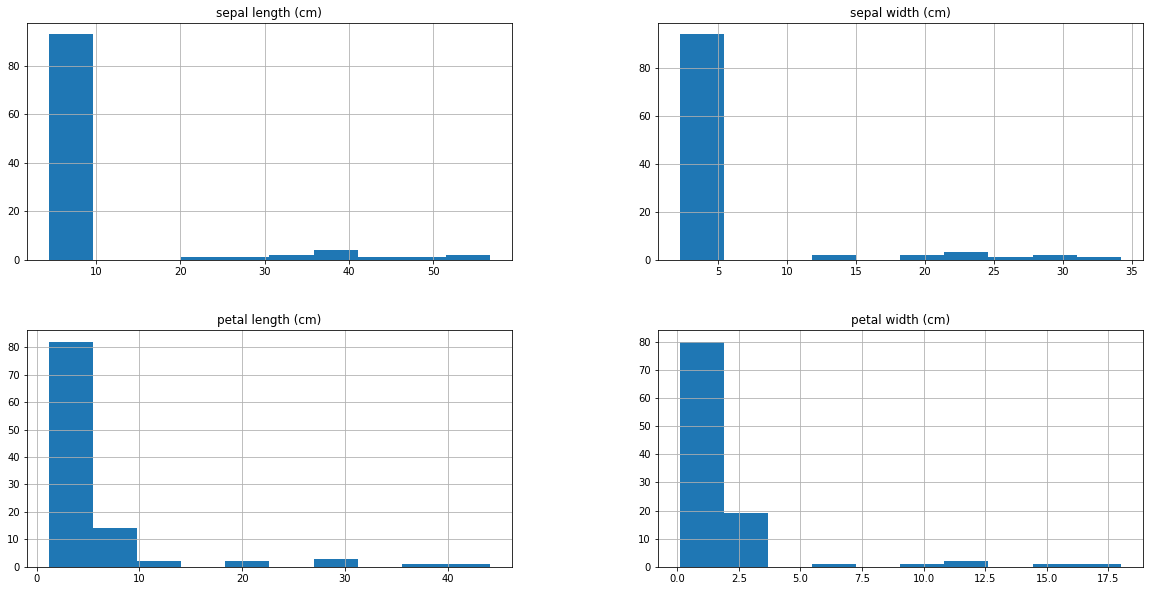

In [71]:
iris_train.hist(bins=10, figsize=(20,10))


**<font color='blue'>2. Do the same with boxplot.**

<AxesSubplot:>

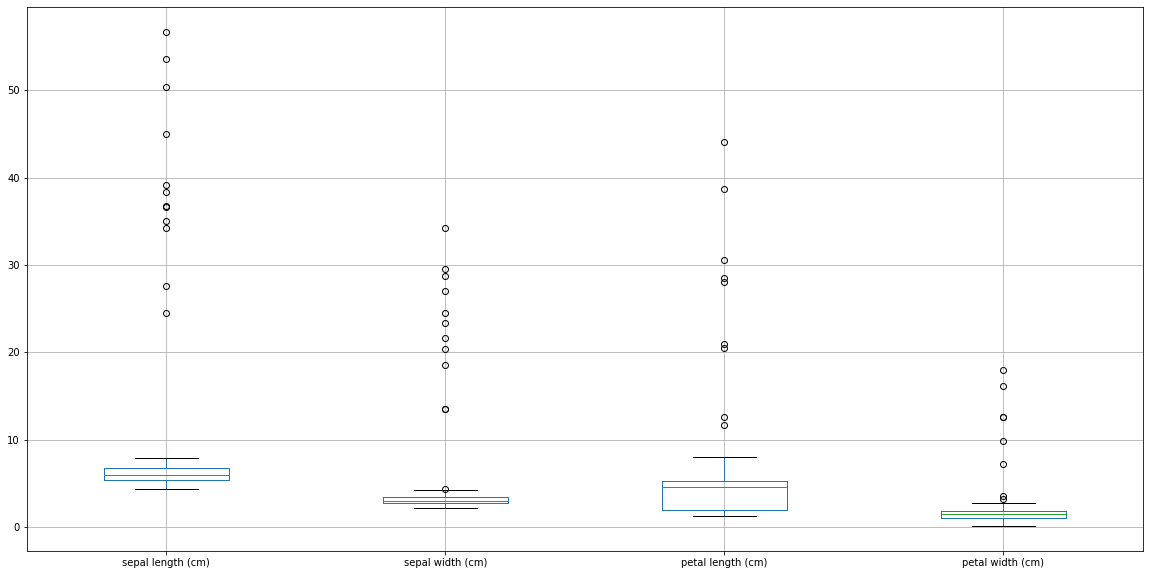

In [146]:
iris_train.boxplot(figsize=(20,10))
#There are ourliers for all the features.

The interquartile range can be used to detect outliers.

It can be done using the scipy iqr() class [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html). <br> In this exercise, we will do it manually on the imputed training features of the iris dataset.



**<font color='blue'>3.a. Calculate the 1st quartile (Q1) and the 3rd quartile (Q3) of the data.**

*Tips: It can be done using the pandas [quantile() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) or the Numpy [quantile() method](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)*

In [116]:
q1 = iris_train.quantile(q=0.25)
q3 = iris_train.quantile(q=0.75)
print(q1, '\n' ,q3)

sepal length (cm)    5.4
sepal width (cm)     2.8
petal length (cm)    1.9
petal width (cm)     1.0
Name: 0.25, dtype: float64 
 sepal length (cm)    6.7
sepal width (cm)     3.4
petal length (cm)    5.3
petal width (cm)     1.8
Name: 0.75, dtype: float64


**<font color='blue'>3.b. Calculate the interquartile range: IQR = Q3 - Q1.**

In [117]:
iqr_1 = q3 - q1
iqr_2 = scipy.stats.iqr(iris_train, axis=0)
print(iqr_1)
print(iqr_2)

sepal length (cm)    1.3
sepal width (cm)     0.6
petal length (cm)    3.4
petal width (cm)     0.8
dtype: float64
[1.3 0.6 3.4 0.8]


**<font color='blue'>3.c. Calculate the lower cutoff Q1 - 1.5 x IQR and the higher cutoff Q3 + 1.5 x IQR**

In [133]:
low_co = q1 - 1.5 * iqr_2
high_co = q3 + 1.5 * iqr_2
print(low_co)
print(high_co)

sepal length (cm)    3.45
sepal width (cm)     1.90
petal length (cm)   -3.20
petal width (cm)    -0.20
Name: 0.25, dtype: float64
sepal length (cm)     8.65
sepal width (cm)      4.30
petal length (cm)    10.40
petal width (cm)      3.00
Name: 0.75, dtype: float64


**<font color='blue'>3.d. Use the lower and the higher cutoff to find the outliers in the data.**

*Tips: Any value higher than the higher cutoff or lower than the lower cutoff is an outlier.*

In [148]:
# lower_set = iris_train[iris_train.where(iris_train<low_co).notna()==True]
# print(lower_set) 
lower_set = iris_train[iris_train[iris_train<low_co].notna().any(axis=1)]
higher_set = iris_train[iris_train[iris_train>high_co].notna().any(axis=1)]
print(higher_set.shape)
print(lower_set.shape)
#We can see that there has no outliers for lower cutoff.

(35, 4)
(0, 4)


**<font color='blue'>4. Replace the upper outliers by the Q3 value and the lower outliers by the Q1 value.**

*Tips: You can use the `.mask()` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) of pandas.*

In [160]:
#Replace lower outliers for train dataset
print(iris_train)
iris_masked_train = iris_train.mask(iris_train>high_co, high_co, axis=1)
print(iris_masked_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.2               3.5                1.5               0.2
1                  7.7               2.8                6.7              18.0
2                  6.3               3.3                4.7               1.6
3                  5.0               3.3                1.4               0.2
4                  5.6               2.8                4.9               2.0
..                 ...               ...                ...               ...
100               36.6               3.0                4.6               1.4
101                5.3              29.6                1.5               1.5
102                6.0               2.5                3.9               1.1
103                6.4              13.5                5.3               1.9
104                6.1               3.0                4.9               1.8

[105 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

**<font color='blue'>5. Apply the same outlier transformation to the validation and the testing sets.**

In [161]:
#Replace lower outliers for validation dataset
print(iris_val)
iris_masked_val = iris_val.mask(iris_val>high_co, high_co, axis=1)
print(iris_masked_val)

#Replace lower outliers for test dataset
print(iris_test)
iris_masked_test = iris_test.mask(iris_test>high_co, high_co, axis=1)
print(iris_masked_test)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                7.70              15.6               6.90              2.30
1               33.60               3.0               1.40              0.10
2                6.55              20.3               4.30              6.50
3                7.00               3.2               4.70              1.25
4               40.80               3.8               1.60              0.20
5                6.40               3.1              27.50             12.60
6                5.70               3.3               4.55              1.30
7                5.80              13.0               4.00              1.20
8                6.70               3.3               5.70              2.10
9                5.00               3.0               1.60              0.20
10               7.10               3.3               5.90              2.10
11              52.20               4.0               1.20              0.20

# Transformation

In the following exercise, we will use the cleaned iris training dataset i.e. the dataset without any missing values and outliers obtained at the previous exercise.

## Log transformation

**<font color='blue'>1. Display the histograms of the features.**

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

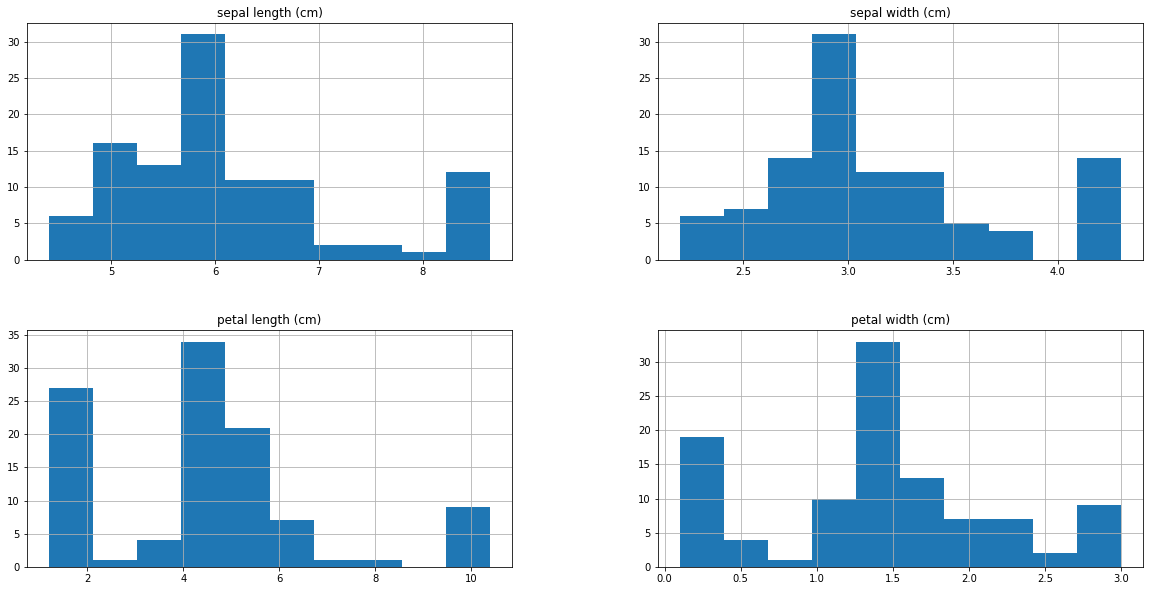

In [164]:
iris_masked_train.hist(bins=10, figsize=(20, 10))

**<font color='blue'>2. Apply the logarithm transformation to the features.**

*Tips: You can use the log() function from Numpy.*

In [168]:
iris_loged_train = np.log(iris_masked_train)

**<font color='blue'>3. Display the histograms of the modified features.<br> What happened ?**

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

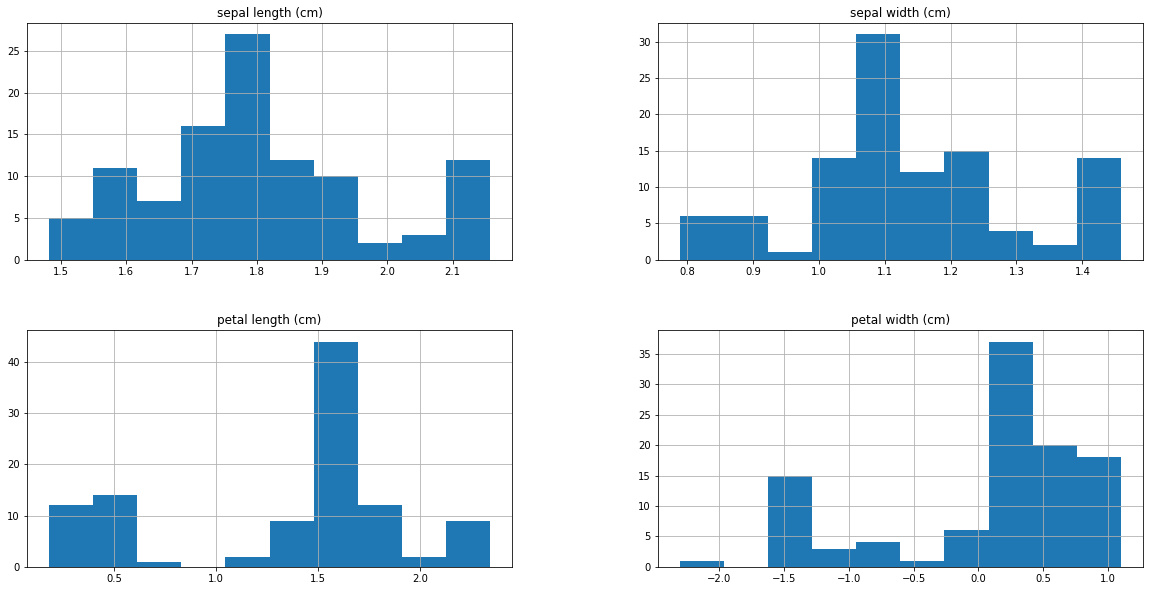

In [170]:
iris_loged_train.hist(figsize=(20, 10), bins= 10)

## Min-Max Scaling

First, let's compute the Min-Max Scaling by hands.

**<font color='blue'>1. Calculate the minimum and the maximum of the features.**

*Tips: You can use the pandas .min() and .max() methods directly on the dataframe.*

In [171]:
min_value = iris_masked_train.min()
max_value = iris_masked_train.max()
print(min_value)
print(max_value)

sepal length (cm)    4.4
sepal width (cm)     2.2
petal length (cm)    1.2
petal width (cm)     0.1
dtype: float64
sepal length (cm)     8.65
sepal width (cm)      4.30
petal length (cm)    10.40
petal width (cm)      3.00
dtype: float64


The min-max scaling method is simply:

$X = \frac{X-X_{min}}{X_{max}-X_{min}}$

**<font color='blue'>2. Transform the features using the min-max scaling method.**

*Tips: You can transform all the features simultaneously if you are using a Pandas dataframe or a Numpy array.*

In [172]:
iris_minmax_train = (iris_masked_train - min_value)/(max_value - min_value)
print(iris_minmax_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.188235          0.619048           0.032609          0.034483
1             0.776471          0.285714           0.597826          1.000000
2             0.447059          0.523810           0.380435          0.517241
3             0.141176          0.523810           0.021739          0.034483
4             0.282353          0.285714           0.402174          0.655172
..                 ...               ...                ...               ...
100           1.000000          0.380952           0.369565          0.448276
101           0.211765          1.000000           0.032609          0.482759
102           0.376471          0.142857           0.293478          0.344828
103           0.470588          1.000000           0.445652          0.620690
104           0.400000          0.380952           0.402174          0.586207

[105 rows x 4 columns]


**<font color='blue'>3. Apply the min-max scaling method to the validation and testing sets.**

*Tips: Similarly, you need to reuse the calculations made on the training set.*

In [173]:
iris_minmax_val = (iris_masked_val - min_value)/(max_value - min_value)
iris_minmax_test = (iris_masked_test - min_value)/(max_value - min_value)
print(iris_minmax_val)
print(iris_minmax_test)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            0.776471          1.000000           0.619565          0.758621
1            1.000000          0.380952           0.021739          0.000000
2            0.505882          1.000000           0.336957          1.000000
3            0.611765          0.476190           0.380435          0.396552
4            1.000000          0.761905           0.043478          0.034483
5            0.470588          0.428571           1.000000          1.000000
6            0.305882          0.523810           0.364130          0.413793
7            0.329412          1.000000           0.304348          0.379310
8            0.541176          0.523810           0.489130          0.689655
9            0.141176          0.380952           0.043478          0.034483
10           0.635294          0.523810           0.510870          0.689655
11           1.000000          0.857143           0.000000          0.034483


The MinMaxScaler [class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is used to transform numerical data into a specific range, typically between 0 and 1, by scaling each feature to a specified minimum and maximum value.

The MinMaxScaler class has two important methods, fit() and transform().

* `fit()` is used to compute the minimum and maximum values for each feature in the input data. These values are used to perform the scaling operation.

* `transform()` is used to perform the actual scaling operation on the input data using the computed minimum and maximum values.

Here's an example usage of MinMaxScaler:

```
scl=MinMaxScaler()
scl.fit(X_train)
X_train_std = scl.transform(X_train)
```

**<font color='blue'>4. Do the same as the previous questions using the Sklearn `MinMaxScaler` class.**

*Tips: Again, don't forget to compute on the training set and to only apply on the validation & resting sets*

In [183]:
scl_mms = MinMaxScaler()
scl_mms.fit(iris_masked_train)
X_train_mms = pd.DataFrame(scl_mms.transform(iris_masked_train), columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(X_train_mms[:10])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.188235          0.619048           0.032609          0.034483
1           0.776471          0.285714           0.597826          1.000000
2           0.447059          0.523810           0.380435          0.517241
3           0.141176          0.523810           0.021739          0.034483
4           0.282353          0.285714           0.402174          0.655172
5           0.376471          0.476190           0.445652          0.758621
6           0.329412          1.000000           0.293478          0.379310
7           0.376471          0.000000           0.413043          0.482759
8           0.588235          0.476190           0.489130          0.758621
9           0.423529          0.571429           0.456522          0.758621


**<font color='blue'>5. Display the histograms of the scaled features. What can you see ?**

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

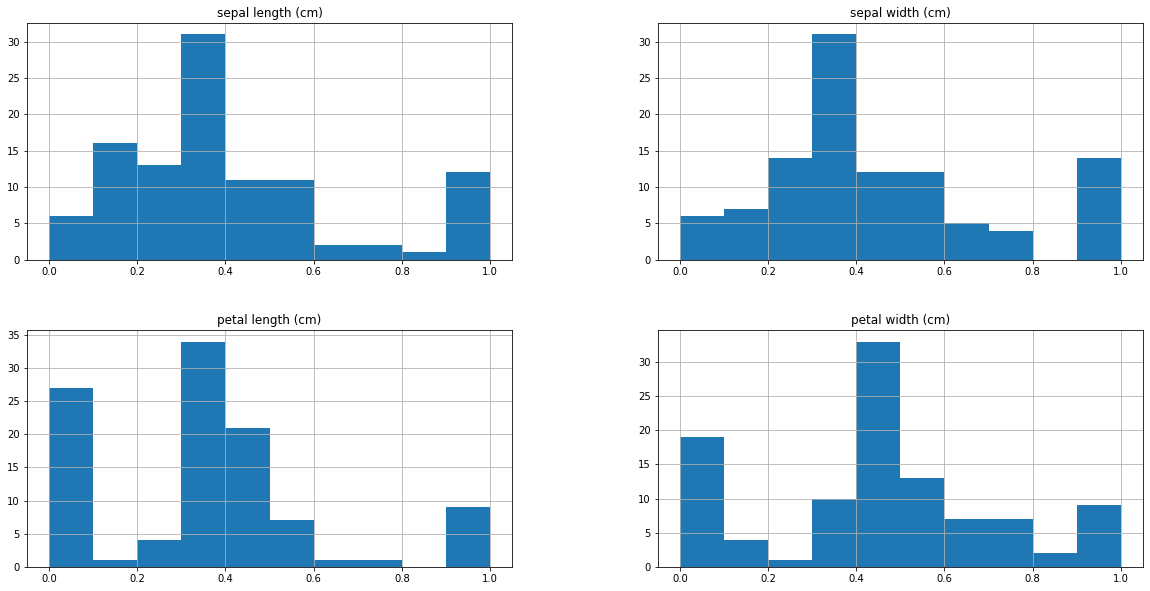

In [184]:
X_train_mms.hist(bins=10, figsize=(20,10))

## Standardization

First, let's compute the z-score Scaling by hands.

**<font color='blue'>1. Calculate the mean and the standard deviation of the features.**

*Tips: You can use the pandas .min() and .max() methods directly on the dataframe.*

In [186]:
mean_value = iris_masked_train.mean()
std_value = iris_masked_train.std()
print(mean_value)
print(std_value)

sepal length (cm)    6.180952
sepal width (cm)     3.170476
petal length (cm)    4.504762
petal width (cm)     1.420952
dtype: float64
sepal length (cm)    1.131591
sepal width (cm)     0.548236
petal length (cm)    2.443609
petal width (cm)     0.805235
dtype: float64


The z-score scaling method is simply:

$X = \frac{X-X_{mean}}{X_{std}}$

**<font color='blue'>2. Transform the features using the z-score scaling method.**

*Tips: You can transform all the features simultaneously if you are using a Pandas dataframe or a Numpy array.*

In [187]:
#Z-score of training dataset
iris_z_score_train = (iris_masked_train - mean_value)/std_value
print(iris_z_score_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.866879          0.601062          -1.229641         -1.516269
1             1.342399         -0.675761           0.898359          1.960978
2             0.105204          0.236256           0.079897          0.222355
3            -1.043621          0.236256          -1.270564         -1.516269
4            -0.513394         -0.675761           0.161744          0.719104
..                 ...               ...                ...               ...
100           2.181925         -0.310954           0.038974         -0.026020
101          -0.778507          2.060289          -1.229641          0.098167
102          -0.159910         -1.222971          -0.247487         -0.398582
103           0.193575          2.060289           0.325436          0.594917
104          -0.071539         -0.310954           0.161744          0.470729

[105 rows x 4 columns]


**<font color='blue'>3. Apply the z-score scaling method to the validation and testing sets.**

*Tips: Similarly, you need to reuse the calculations made on the training set.*

In [189]:
#Z-score of validation dataset
iris_z_score_val = (iris_masked_val - mean_value)/std_value
print(iris_z_score_val.head())
#Z-score of testing dataset
iris_z_score_test = (iris_masked_test - mean_value)/std_value
print(iris_z_score_test.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           1.342399          2.060289           0.980205          1.091666
1           2.181925         -0.310954          -1.270564         -1.640456
2           0.326132          2.060289          -0.083795          1.960978
3           0.723802          0.053852           0.079897         -0.212301
4           2.181925          1.148272          -1.188718         -1.516269
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.281946         -0.310954           0.284513          1.960978
1          -0.425023         -1.770181          -0.001949          0.098167
2          -1.131992         -1.405374          -0.001949          0.098167
3          -0.866879          0.418659          -0.001949          0.098167
4           0.105204         -1.222971           0.202667          1.960978


StandardScaler is a scikit-learn [class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that is used to standardize numerical data by removing the mean and scaling to unit variance.

The StandardScaler class in scikit-learn has two main methods: `fit()` and `transform()`.

* `fit()` is used to compute the mean and standard deviation of each feature in the input data. These values are used to perform the standardization operation.

* `transform()` is used to perform the actual standardization operation on the input data using the computed mean and standard deviation values.

Here's an example usage of StandardScaler:

```
scl=StandardScaler()
scl.fit(X_train)
X_train_std = scl.transform(X_train)
```

**<font color='blue'>4. Do the same as the previous questions using the Sklearn `StandardScaler` class.**

*Tips: Again, don't forget to compute on the training set and to only apply on the validation & resting sets*

In [194]:
scl_std = StandardScaler()
scl_std.fit(iris_masked_train)
X_train_std = pd.DataFrame(scl_std.transform(iris_masked_train),columns=iris_masked_train.columns)
print(X_train_std)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.871036          0.603945          -1.235538         -1.523541
1             1.348838         -0.679002           0.902668          1.970383
2             0.105708          0.237389           0.080281          0.223421
3            -1.048626          0.237389          -1.276658         -1.523541
4            -0.515856         -0.679002           0.162519          0.722553
..                 ...               ...                ...               ...
100           2.192390         -0.312446           0.039161         -0.026145
101          -0.782241          2.070171          -1.235538          0.098638
102          -0.160677         -1.228837          -0.248674         -0.400494
103           0.194503          2.070171           0.326997          0.597770
104          -0.071882         -0.312446           0.162519          0.472987

[105 rows x 4 columns]


**<font color='blue'>5. Compare the results with the MinMaxScaler.**

In [195]:
print(X_train_mms)
print(X_train_std)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.188235          0.619048           0.032609          0.034483
1             0.776471          0.285714           0.597826          1.000000
2             0.447059          0.523810           0.380435          0.517241
3             0.141176          0.523810           0.021739          0.034483
4             0.282353          0.285714           0.402174          0.655172
..                 ...               ...                ...               ...
100           1.000000          0.380952           0.369565          0.448276
101           0.211765          1.000000           0.032609          0.482759
102           0.376471          0.142857           0.293478          0.344828
103           0.470588          1.000000           0.445652          0.620690
104           0.400000          0.380952           0.402174          0.586207

[105 rows x 4 columns]
     sepal length (cm)  sepal width (cm)